# Bond Price Prediction

In this notebook I will write a model that predicts the United States ten year treasury bond yield yield using the price of commodities currencies and other bond yields. The data was compiled by me with the help of the [St.Louis Fed](https://fred.stlouisfed.org/).

In [1]:
import os

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"


### Preprocessing

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('10YR_Model.csv')
data.head(15)

,date,CRUDE,GOLD,JPY,AAA Corporate Yield,3m,1YR,2YR,5YR,10YR
0,1986-01-02,25.56,326.30,199.15,0.88,7.10,7.64,8.02,8.51,9.04
1,1986-01-03,26.00,326.75,202.53,0.87,7.07,7.65,8.03,8.52,9.05
2,1986-01-06,26.53,328.00,201.90,0.87,7.06,7.64,8.04,8.54,9.07
3,1986-01-07,25.85,330.00,201.70,0.91,7.03,7.59,7.97,8.44,8.94
4,1986-01-08,25.87,332.60,202.10,0.76,7.17,7.73,8.09,8.58,9.13
5,1986-01-09,26.03,333.50,202.10,0.71,7.18,7.83,8.27,8.78,9.27
6,1986-01-10,25.65,340.45,202.35,0.70,7.21,7.89,8.36,8.89,9.39
7,1986-01-13,25.08,339.40,202.70,0.75,7.24,7.95,8.38,9.00,9.49
8,1986-01-14,24.97,341.00,202.60,0.75,7.24,7.93,8.33,8.93,9.43
9,1986-01-15,25.18,346.75,202.50,0.86,7.19,7.85,8.24,8.82,9.31


In [3]:
# Droping rows of data that contain values of zero
tenyr = data.dropna()
tenyr

,date,CRUDE,GOLD,JPY,AAA Corporate Yield,3m,1YR,2YR,5YR,10YR
0,1986-01-02,25.56,326.30,199.15,0.88,7.10,7.64,8.02,8.51,9.04
1,1986-01-03,26.00,326.75,202.53,0.87,7.07,7.65,8.03,8.52,9.05
2,1986-01-06,26.53,328.00,201.90,0.87,7.06,7.64,8.04,8.54,9.07
3,1986-01-07,25.85,330.00,201.70,0.91,7.03,7.59,7.97,8.44,8.94
4,1986-01-08,25.87,332.60,202.10,0.76,7.17,7.73,8.09,8.58,9.13
5,1986-01-09,26.03,333.50,202.10,0.71,7.18,7.83,8.27,8.78,9.27
6,1986-01-10,25.65,340.45,202.35,0.70,7.21,7.89,8.36,8.89,9.39
7,1986-01-13,25.08,339.40,202.70,0.75,7.24,7.95,8.38,9.00,9.49
8,1986-01-14,24.97,341.00,202.60,0.75,7.24,7.93,8.33,8.93,9.43
9,1986-01-15,25.18,346.75,202.50,0.86,7.19,7.85,8.24,8.82,9.31


In [81]:
# The pandas corr function gives the correlation between all of the elements in a dataframe
tenyr.corr(method ='pearson')

,CRUDE,GOLD,JPY,AAA Corporate Yield,3m,1YR,2YR,5YR,10YR
CRUDE,1.000000,0.804183,-0.594716,0.397948,-0.661742,-0.678997,-0.709514,-0.730625,-0.709916
GOLD,0.804183,1.000000,-0.576036,0.440042,-0.730055,-0.738982,-0.762911,-0.792997,-0.780429
JPY,-0.594716,-0.576036,1.000000,-0.421045,0.630930,0.629864,0.643156,0.654360,0.635064
AAA Corporate Yield,0.397948,0.440042,-0.421045,1.000000,-0.718286,-0.735976,-0.735314,-0.710121,-0.663000
3m,-0.661742,-0.730055,0.630930,-0.718286,1.000000,0.994365,0.982830,0.946703,0.902359
1YR,-0.678997,-0.738982,0.629864,-0.735976,0.994365,1.000000,0.995027,0.965948,0.925428
2YR,-0.709514,-0.762911,0.643156,-0.735314,0.982830,0.995027,1.000000,0.985078,0.952789
5YR,-0.730625,-0.792997,0.654360,-0.710121,0.946703,0.965948,0.985078,1.000000,0.988943
10YR,-0.709916,-0.780429,0.635064,-0.663000,0.902359,0.925428,0.952789,0.988943,1.000000


In [55]:
# Splitting data into training and testing sets both ordered and not orders to make producing charts at the end easier

from sklearn.model_selection import train_test_split

train, test = train_test_split(tenyr, test_size=0.2)
train_labels = train['10YR']
test_labels = test['10YR']

ordered_train, ordered_test = train_test_split(tenyr, test_size=0.2, shuffle=False)
ordered_train_labels = ordered_train['10YR']
ordered_test_labels = ordered_test['10YR']


In [19]:
# Dropping the label column leaving us with a dataframe of features
train = train.drop(['date'], axis=1)
test = test.drop(['date'], axis=1)

ordered_train = ordered_train.drop(['date'], axis=1)
ordered_test = ordered_test.drop(['date'], axis=1)

In [20]:
# Describing data to make normalizing easier
train_stats = train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
CRUDE,6500.0,43.825920,29.403348,10.82,19.6200,30.310,63.8325,145.31
GOLD,6500.0,686.048223,445.585423,252.80,354.8750,412.150,1165.2125,1877.50
JPY,6500.0,114.826742,19.392504,75.72,104.1000,112.880,124.2500,202.70
AAA Corporate Yield,6500.0,1.351143,0.465793,0.35,0.9400,1.340,1.7100,3.00
3m,6500.0,3.199866,2.474816,-0.01,0.7275,3.170,5.1400,9.07
1YR,6500.0,3.588360,2.612684,0.09,1.0300,3.590,5.6400,9.77
2YR,6500.0,3.910748,2.629235,0.17,1.2775,4.100,6.0100,9.86
5YR,6500.0,4.504078,2.415973,0.56,2.2700,4.595,6.4200,9.84
10YR,6500.0,5.027302,2.190160,1.37,2.9900,4.815,6.7200,10.23


In [23]:
# Normalizing data to make training more efficient and accurate
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train = norm(train)
normed_test = norm(test)
normed_ordered_train = norm(ordered_train)
normed_ordered_test = norm(ordered_test)

### Building Model

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import optimizers
from keras import layers

dims = train.shape[1]
print(dims, 'dims')
print("Building model.....")

# The MLP I built contains two dense layers and a dropout layer to prevent overfitting
model = Sequential()
model.add(Dense(128, input_dim=9, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

opt = optimizers.RMSprop(lr=.001)

model.compile(loss='mse',
              optimizer=opt,
              metrics=['mae'])


9 dims
Building model.....


In [29]:
# Fit the model to the data
model.fit(normed_ordered_train, ordered_train_labels,
          epochs=30,
          batch_size=128)



Epoch 1/30
6500/6500 [==============================] - 0s 36us/step - loss: 0.3636 - mean_absolute_error: 0.4293
Epoch 2/30
6500/6500 [==============================] - 0s 30us/step - loss: 0.1388 - mean_absolute_error: 0.2867
Epoch 3/30
6500/6500 [==============================] - 0s 32us/step - loss: 0.1226 - mean_absolute_error: 0.2670
Epoch 4/30
6500/6500 [==============================] - 0s 32us/step - loss: 0.1158 - mean_absolute_error: 0.2584
Epoch 5/30
6500/6500 [==============================] - 0s 31us/step - loss: 0.1053 - mean_absolute_error: 0.2461
Epoch 6/30
6500/6500 [==============================] - 0s 35us/step - loss: 0.1000 - mean_absolute_error: 0.2389
Epoch 7/30
6500/6500 [==============================] - 0s 33us/step - loss: 0.0962 - mean_absolute_error: 0.2329
Epoch 8/30
6500/6500 [==============================] - 0s 30us/step - loss: 0.0861 - mean_absolute_error: 0.2197
Epoch 9/30
6500/6500 [==============================] - 0s 33us/step - loss: 0.0885 - me

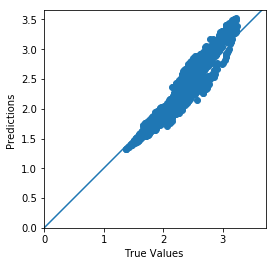

In [30]:
# Below I have plotted the predictions against the true values to visualize how well the model works.

import matplotlib.pyplot as plt

test_predictions = model.predict(normed_ordered_test).flatten()

plt.scatter(ordered_test_labels, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

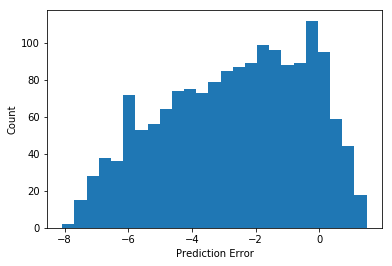

In [31]:
# Below will show how the model error is distributed 

error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [32]:
# Saving the Kera model

from keras.models import load_model

model.save('TEN_YEAR_model.h5')  

In [33]:
# Loading saved model
model = load_model('TEN_YEAR_model.h5')

### Visualize model Perfomance

In [63]:
#convert test labels to array so that it could be plotted easier
ordered_test_labels=ordered_test_labels.values
# Use model to make predictions on test data
ordered_test_predictions = model.predict(normed_ordered_test)


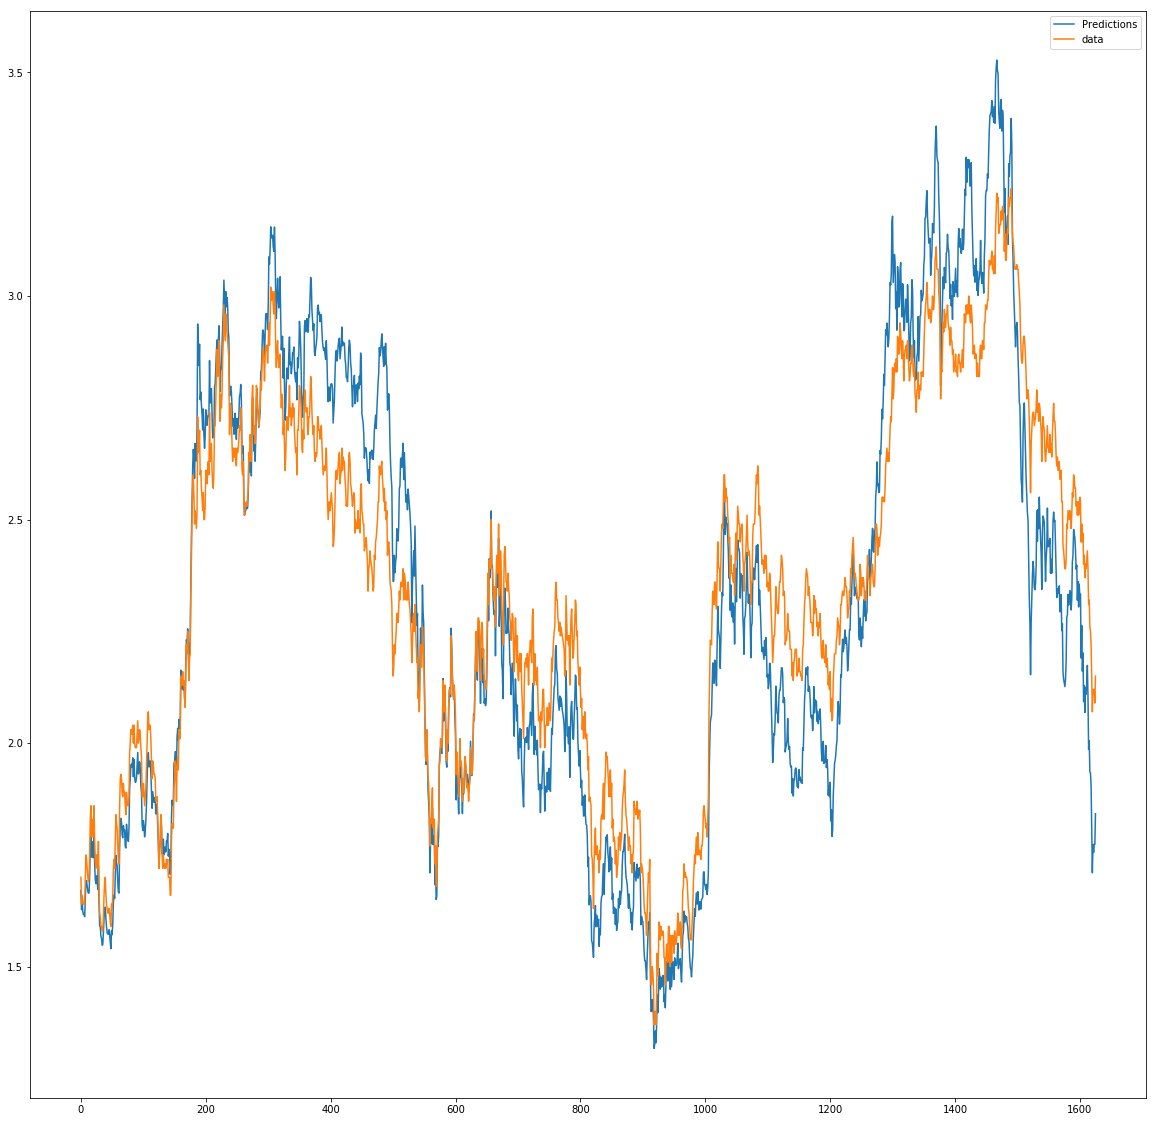

In [80]:
# Plot test predictions and test data
fig, ax = plt.subplots(figsize=(20,20))

ax.plot(ordered_test_predictions, label='Predictions')
ax.plot(ordered_test_labels, label='data')
ax.legend()

In [68]:
# Convert labels to an array for ease of plotting
ordered_train_labels=ordered_train_labels.values

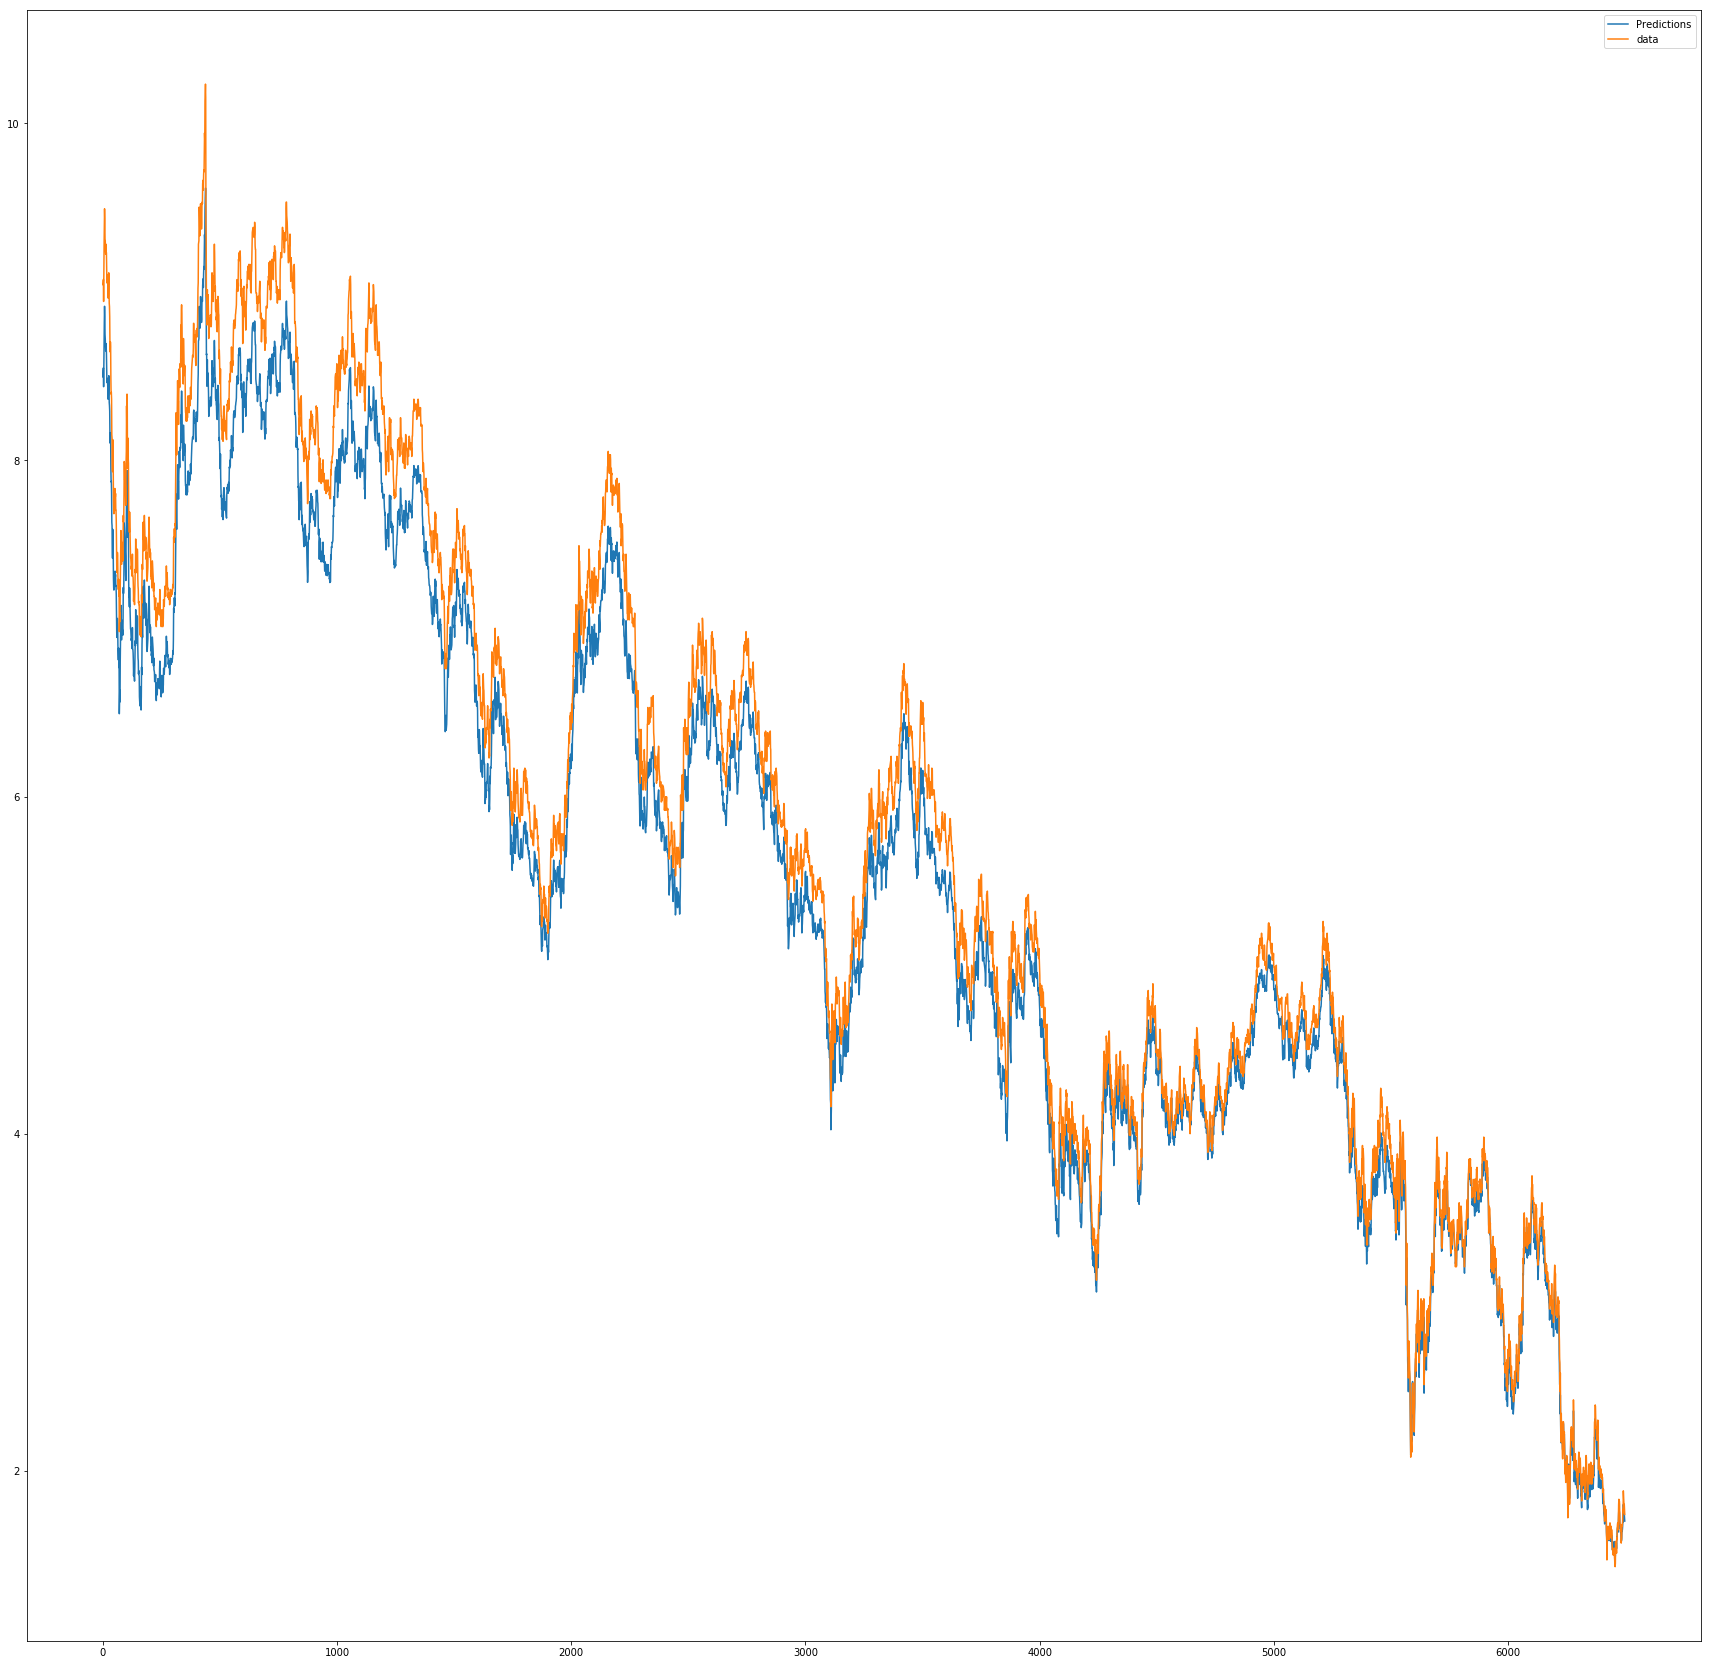

In [79]:
# Plot train predictions and train data
train_predictions = model.predict(normed_ordered_train)

fig, ax = plt.subplots(figsize=(30,30))

ax.plot(train_predictions, label='Predictions')
ax.plot(ordered_train_labels, label='data')
ax.legend()
